In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
df = pd.read_excel('w4-40-polaron-v3.xlsx')
df2 = pd.read_excel('w4-40-equal-v4.xlsx')

In [4]:
l = list(range(2,30))+list(range(30,100,5))+list(range(105,156,5))+[159]

In [5]:
# mu5 = (df[(df['Nup_total']==i+1) & (df['Ndown_total']==1)]['E'].values[0] - df[(df['Nup_total']==i) & (df['Ndown_total']==0)]['E'].values[0])/2
# h5 = (df[(df['Nup_total']==i-1) & (df['Ndown_total']==1)]['E'].values[0] - df[(df['Nup_total']==i) & (df['Ndown_total']==0)]['E'].values[0])/-2
    

# Полярон

In [5]:
mu1, h1 = [], []
for i in l:
    mu = (df[(df['Nup_total']==i+1) & (df['Ndown_total']==1)]['E'].values[0] - df[(df['Nup_total']==i) & (df['Ndown_total']==0)]['E'].values[0])/2
    h = (df[(df['Nup_total']==i-1) & (df['Ndown_total']==1)]['E'].values[0] - df[(df['Nup_total']==i) & (df['Ndown_total']==0)]['E'].values[0])/-2
    mu1.append(mu)
    h1.append(h)

# Равные

In [6]:
df2_list = list(range(2,30))+list(range(30,81,5))

In [7]:
mu_, h_ = [], []
for i in df2_list:
    mu = (df2[(df2['Nup_total']==i+1) & (df2['Ndown_total']==i+1)]['E'].values[0] - df2[(df2['Nup_total']==i) & (df2['Ndown_total']==i)]['E'].values[0])/2
    h = (df2[(df2['Nup_total']==i+1) & (df2['Ndown_total']==i-1)]['E'].values[0] - df2[(df2['Nup_total']==i) & (df2['Ndown_total']==i)]['E'].values[0])/2
    mu_.append(mu)
    h_.append(h)

# Доп.Линии

In [8]:
e11 = df[(df['Nup_total']==1) & (df['Ndown_total']==1)]['E'].values[0]
e10 = df[(df['Nup_total']==159) & (df['Ndown_total']==0)]['E'].values[0]

def mu(h):
    return -h +e10

def mu3(h):
    return -h - e10

h = np.arange(h1[0], 10, 0.1)
h3 = np.arange(6.5, 10, 0.1)

In [47]:
0.16*160

25.6

In [49]:
range(2,30)[23]

25

In [50]:
list(zip(mu_,h_))[23]

(-4.195711871588202, 1.3065174613613948)

In [44]:
list(zip(mu1,h1))[22]

(-4.439341556053584, 2.1946416796811548)

In [12]:
list(filter(lambda x: x[0] == -4.484143700892602169,  zip(mu1,h1)))[0]

(-4.484143700892602, 2.0197717737798655)

In [13]:
ddf = pd.DataFrame(list(zip(mu1,h1)))
ddf.columns = ['mu', 'h']

In [14]:
plt.hline??

Object `plt.hline` not found.


In [16]:
# %matplotlib notebook
# plt.figure(figsize=(12, 7))

# ddf.plot(x = 'h', y = 'mu')
# plt.axhline(y=-4.484143700892602169, xmax = 3, ls='-', c = 'red') 

In [27]:
df = pd.concat([df, df2]).reset_index(drop = True)

In [28]:
df

,truncation_error,E,L,Ndown_total,Nup_total,eq,Unnamed: 0
0,-5.551115e-17,-9.200085,40,1,1,False,NaN
1,4.440892e-16,-12.805308,40,1,2,False,NaN
2,1.814521e-15,-16.390134,40,1,3,False,NaN
3,2.091724e-15,-19.942724,40,1,4,False,NaN
4,2.506290e-15,-23.451008,40,1,5,False,NaN
...,...,...,...,...,...,...,...
226,3.369590e-06,-643.623423,40,80,80,NaN,87.0
227,5.730318e-06,-531.929251,40,64,66,NaN,88.0
228,6.521240e-06,-604.537542,40,74,76,NaN,89.0
229,1.400079e-05,-640.022510,40,79,81,NaN,90.0


# График

<ipython-input-9-35ab15fb82c4>:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(h1, mu1, '-', color='#1f77b4', **kwds)
<ipython-input-9-35ab15fb82c4>:9: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(h, mu(h), '-', color = '#2ca02c', ls='-')


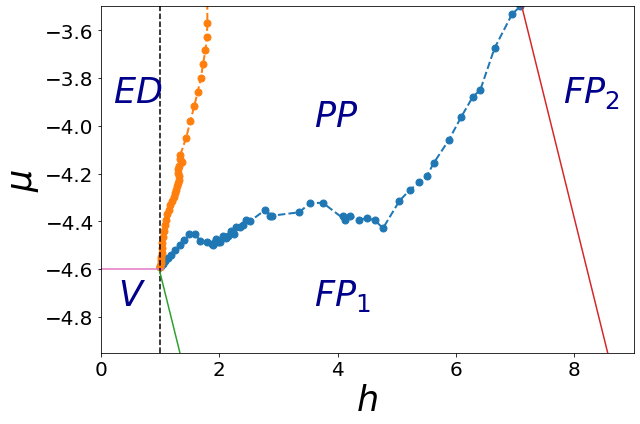

In [9]:
plt.figure(figsize=(9, 6))
# ['', '', '', ''
kwds = dict(ls='--', marker='o', lw=2, markersize=7)
plt.plot(h1, mu1, '-', color='#1f77b4', **kwds)
plt.plot(h_, mu_, color='#ff7f0e', **kwds)

plt.axhline(y=(e11/2), color='#e377c2', xmax = h1[0]/8.5, ls='-') 
plt.axvline(x=h1[0], color='black', ls='--')
plt.plot(h, mu(h), '-', color = '#2ca02c', ls='-')
plt.plot(h3, mu3(h3), '-', color = '#d62728')
plt.axis([0, 9, -4.95, -3.5])
plt.text(0.2, -3.9, r'$ED$', fontsize=35, color='darkblue')
# plt.text(0.1, -4.85, r'$N_{\uparrow} = 0$', fontsize=20, color='darkblue')
# plt.text(0.1, -4.95, r'$N_{\downarrow} = 0$', fontsize=20, color='darkblue')
plt.text(0.3, -4.75, r'$V$', fontsize=35, color='darkblue')
plt.text(3.6, -4.0, r'$PP$', fontsize=35, color='darkblue')
plt.text(3.6, -4.75, r'$FP_1$', fontsize=35, color='darkblue')
plt.text(7.8, -3.9, r'$FP_2$', fontsize=35, color='darkblue')
plt.xlabel('$h$', fontsize=35)
plt.ylabel(r'$\mu$', fontsize=35)
plt.gca().xaxis.set_tick_params(labelsize=20)
plt.gca().yaxis.set_tick_params(labelsize=20)
plt.tight_layout()
plt.show()
# plt.savefig('W4.png')

In [26]:
# plt.gca().set_tick_params??

In [ ]:
plt.gca().set_tick_params

In [ ]:
plt.gca().yaxis.set_tick_params

In [ ]:
plt.gca().yaxis.set_tick_params

In [9]:
161*161

25921

In [14]:
combs = set()
for i in range(0,161):
    for j in range(i,161):
        combs.add((i,j))

In [15]:
len(combs)

13041

In [10]:
to_drop = set()
for i in combs:
    for j in combs:
        if (i[0]==j[1]) and (i[1]==j[0]):
            to_drop.add(j)

In [12]:
len(to_drop)

25921

In [20]:
import re
data = []
with open('w4_v2.csv') as f:
    for line in f:
        data.append({'Nup': int(re.search(r'(?<=Nup =)[\d\.]+', line).group()),
               'Ndown': int(re.search(r'(?<=Ndown = )[\d\.]+', line).group()),
               'E': float(re.search(r'(?<=E = )[\d\.-]+', line).group())})

In [21]:
import pandas as pd

In [22]:
df = pd.DataFrame(data)

In [23]:
df

,Nup,Ndown,E
0,137,5,-117.462609
1,129,5,-132.812342
2,128,5,-134.420479
3,127,5,-135.978942
4,132,5,-127.518763
5,130,5,-131.101992
6,126,5,-137.455587
7,17,5,-84.201393
8,18,5,-86.999516
9,125,5,-138.861848
